In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
df.tail(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32541,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
32542,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32543,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32544,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32545,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32546,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
32547,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32548,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32549,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


In [6]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [7]:
#checking the number of unique value in each column
df.nunique().to_frame("No.of unique values")

,No.of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df["Workclass"] = df["Workclass"].replace(" ?",np.nan)
df["Workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [11]:
df["Race"].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [12]:
df["Occupation"] = df["Occupation"].replace(" ?",np.nan)


In [13]:
df["Occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [14]:
df["Native_country"].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [15]:
df["Native_country"]=df["Native_country"].replace(" ?",np.nan)

In [16]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [17]:
df["Workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [18]:
df["Workclass"].fillna("Private",inplace=True)

In [19]:
df["Occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [20]:
df["Occupation"].fillna("Prof-specialty",inplace=True)

In [21]:
df["Native_country"].value_counts()

 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [22]:
df["Native_country"].fillna("United-States",inplace=True)

### lable Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
encoding_cols=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
label_encoders={}
for column in encoding_cols:
    label_encoders[column]=LabelEncoder()
    df[column]=label_encoders[column].fit_transform(df[column])



In [24]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


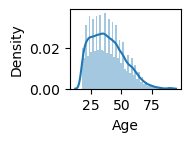

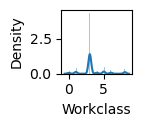

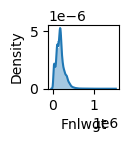

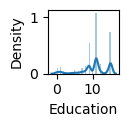

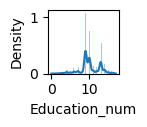

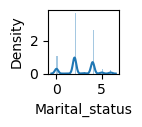

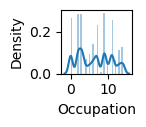

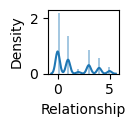

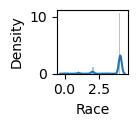

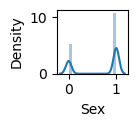

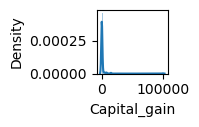

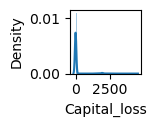

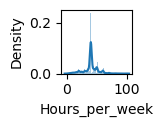

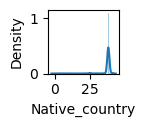

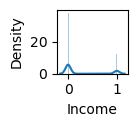

In [25]:
### Lets see how the data is distributed in each column
plt.figure(figsize=(10,6))
plotnumber=1

for col in df:
    if plotnumber<=30:
        ax=plt.subplot(5,6,plotnumber)
        sns.distplot(df[col])
        
        plotnumber+=1
        plt.show()


In [26]:
df.skew()

Age                0.558738
Workclass          1.167293
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.126702
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.205890
Income             1.212383
dtype: float64

### we can see in some of the column the data is skewed so after removing the outliers we can check if there is skewness or not

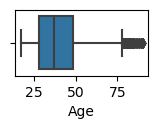

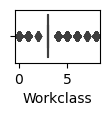

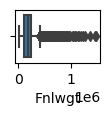

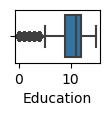

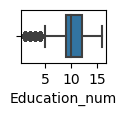

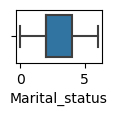

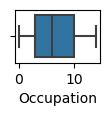

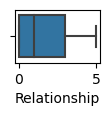

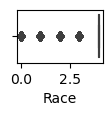

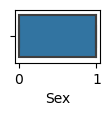

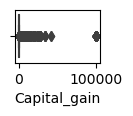

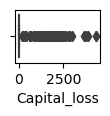

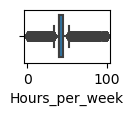

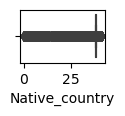

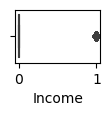

In [27]:
plt.figure(figsize=(10,6))
plotnumber=1

for col in df:
    if plotnumber<=30:
        ax=plt.subplot(6,5,plotnumber)
        sns.boxplot(df[col])
        
        plotnumber+=1
        plt.show()

### we can see the outliers are present in Age,Workclass,Fnlwgt,Education,Education_num,Race,capital_gain,capital_loss,Hours_per_week,Native_country

### The columns Education,Race,Native_country are catogerical column so no need to remove outliers in those columns

In [28]:
from scipy.stats import zscore
out_features=df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]
z=np.abs(zscore(out_features))
z

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.837097,1.008742,1.134779,0.145914,0.216663,2.222120
1,0.042640,0.245046,0.420027,0.145914,0.216663,0.035430
2,1.057031,0.425770,1.197429,0.145914,0.216663,0.035430
3,0.775755,1.408146,1.134779,0.145914,0.216663,0.035430
4,0.115952,0.898170,1.523480,0.145914,0.216663,0.035430
...,...,...,...,...,...,...
32555,0.849066,0.639710,0.746077,0.145914,0.216663,0.197407
32556,0.103982,0.335466,0.420027,0.145914,0.216663,0.035430
32557,1.423589,0.358811,0.420027,0.145914,0.216663,0.035430
32558,1.215624,0.110927,0.420027,0.145914,0.216663,1.655200


In [29]:
np.where(z>3)

(array([    9,    22,    27, ..., 32524, 32524, 32530], dtype=int64),
 array([5, 4, 5, ..., 0, 5, 5], dtype=int64))

In [30]:
df1=df[(z<3).all(axis=1)]
df1.shape

(29827, 15)

In [31]:
#shape of old and new DataFrame
print("old Data Frame-",df.shape[0])
print("New Data Frame-",df1.shape[0])

old Data Frame- 32560
New Data Frame- 29827


In [33]:
print("data loss percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage- 8.393734643734643


In [34]:
df=df1

### Lets check how the data is distributed in each column

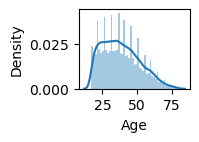

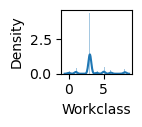

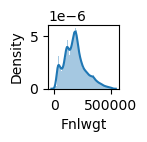

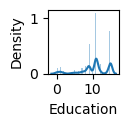

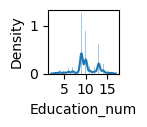

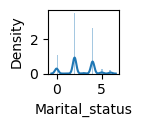

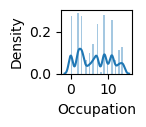

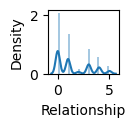

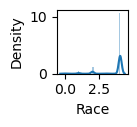

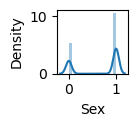

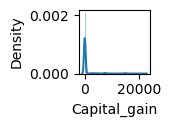

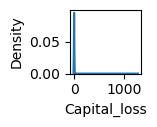

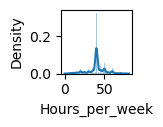

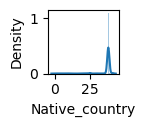

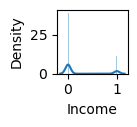

In [39]:
### Lets see how the data is distributed in each column
plt.figure(figsize=(10,6))
plotnumber=1

for col in df:
    if plotnumber<=30:
        ax=plt.subplot(5,6,plotnumber)
        sns.distplot(df[col])
        
        plotnumber+=1
        plt.show()


In [40]:
df.skew()

Age                0.491112
Workclass          1.181900
Fnlwgt             0.634168
Education         -0.942866
Education_num     -0.170298
Marital_status    -0.048971
Occupation         0.130215
Relationship       0.743825
Race              -2.436068
Sex               -0.680003
Capital_gain       4.943642
Capital_loss      29.661241
Hours_per_week    -0.354170
Native_country    -4.297735
Income             1.330372
dtype: float64

### we can see the data is skewed in Capital_loss,Capital_gain,Fnlwgt

### Although we can see the data is skewed in Native_country,Sex,Race,Workcalss but these columns are catogerical columns so no need to remove the skewness

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

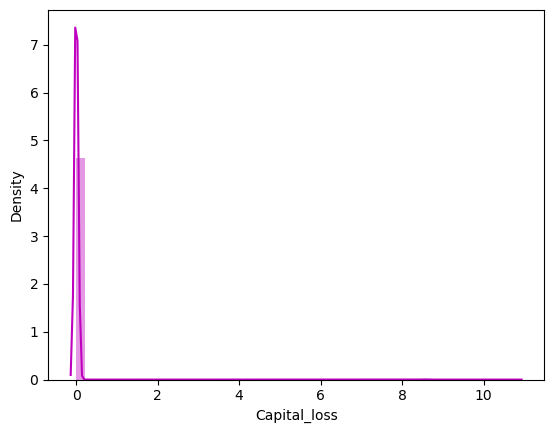

In [41]:
df['Capital_loss']=np.cbrt(df['Capital_loss'])
sns.distplot(df['Capital_loss'],color='m')

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

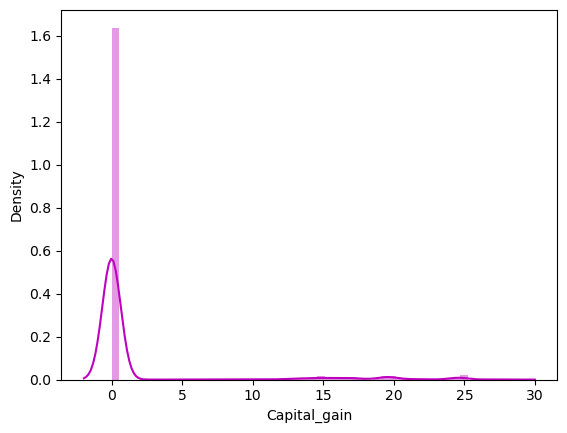

In [42]:
df['Capital_gain']=np.cbrt(df['Capital_gain'])
sns.distplot(df['Capital_gain'],color='m')

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

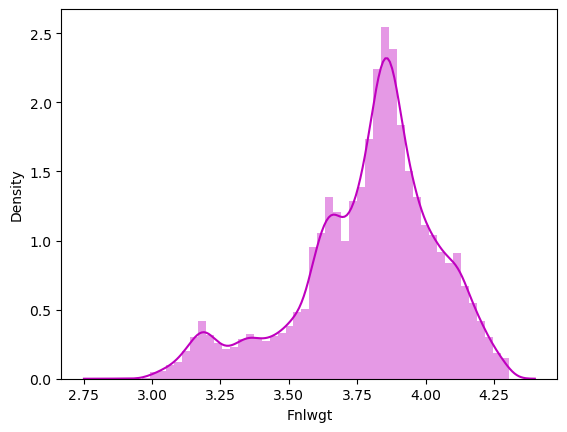

In [44]:
df['Fnlwgt']=np.cbrt(df['Fnlwgt'])
sns.distplot(df['Fnlwgt'],color='m')

In [45]:
df.skew()

Age                0.491112
Workclass          1.181900
Fnlwgt            -0.757166
Education         -0.942866
Education_num     -0.170298
Marital_status    -0.048971
Occupation         0.130215
Relationship       0.743825
Race              -2.436068
Sex               -0.680003
Capital_gain       3.375115
Capital_loss      25.765792
Hours_per_week    -0.354170
Native_country    -4.297735
Income             1.330372
dtype: float64

### Lets see the corelation between target variable and independent variable

In [46]:
cor=df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.042300,-0.058353,-0.008034,0.041426,-0.285664,0.004209,-0.266795,0.027973,0.086565,0.130492,0.020500,0.092195,-0.002166,0.239373
Workclass,0.042300,1.000000,-0.021849,-0.018129,-0.057126,0.042774,0.310413,0.012214,0.019006,0.001906,-0.011235,-0.008667,-0.102716,-0.000116,-0.059749
Fnlwgt,-0.058353,-0.021849,1.000000,-0.021703,-0.032241,0.025872,-0.005192,0.011525,-0.004762,0.020258,-0.000125,0.000276,-0.016582,-0.060985,-0.001791
Education,-0.008034,-0.018129,-0.021703,1.000000,0.349698,-0.034946,-0.046269,-0.010780,0.015231,-0.029532,0.021964,-0.001136,0.055897,0.066098,0.071662
Education_num,0.041426,-0.057126,-0.032241,0.349698,1.000000,-0.058990,0.043259,-0.096523,0.028547,0.009142,0.131681,0.009053,0.150517,0.059046,0.318600
Marital_status,-0.285664,0.042774,0.025872,-0.034946,-0.058990,1.000000,0.052380,0.184776,-0.066197,-0.123321,-0.070863,-0.016001,-0.195285,-0.015793,-0.194458
Occupation,0.004209,0.310413,-0.005192,-0.046269,0.043259,0.052380,1.000000,-0.014312,-0.007773,0.029003,0.001398,-0.001427,-0.065437,-0.000551,0.008193
Relationship,-0.266795,0.012214,0.011525,-0.010780,-0.096523,0.184776,-0.014312,1.000000,-0.116297,-0.577083,-0.091433,0.034251,-0.257918,-0.011403,-0.245894
Race,0.027973,0.019006,-0.004762,0.015231,0.028547,-0.066197,-0.007773,-0.116297,1.000000,0.089770,0.025589,0.000122,0.045336,0.110354,0.071742
Sex,0.086565,0.001906,0.020258,-0.029532,0.009142,-0.123321,0.029003,-0.577083,0.089770,1.000000,0.071847,-0.030993,0.233912,0.003478,0.209938


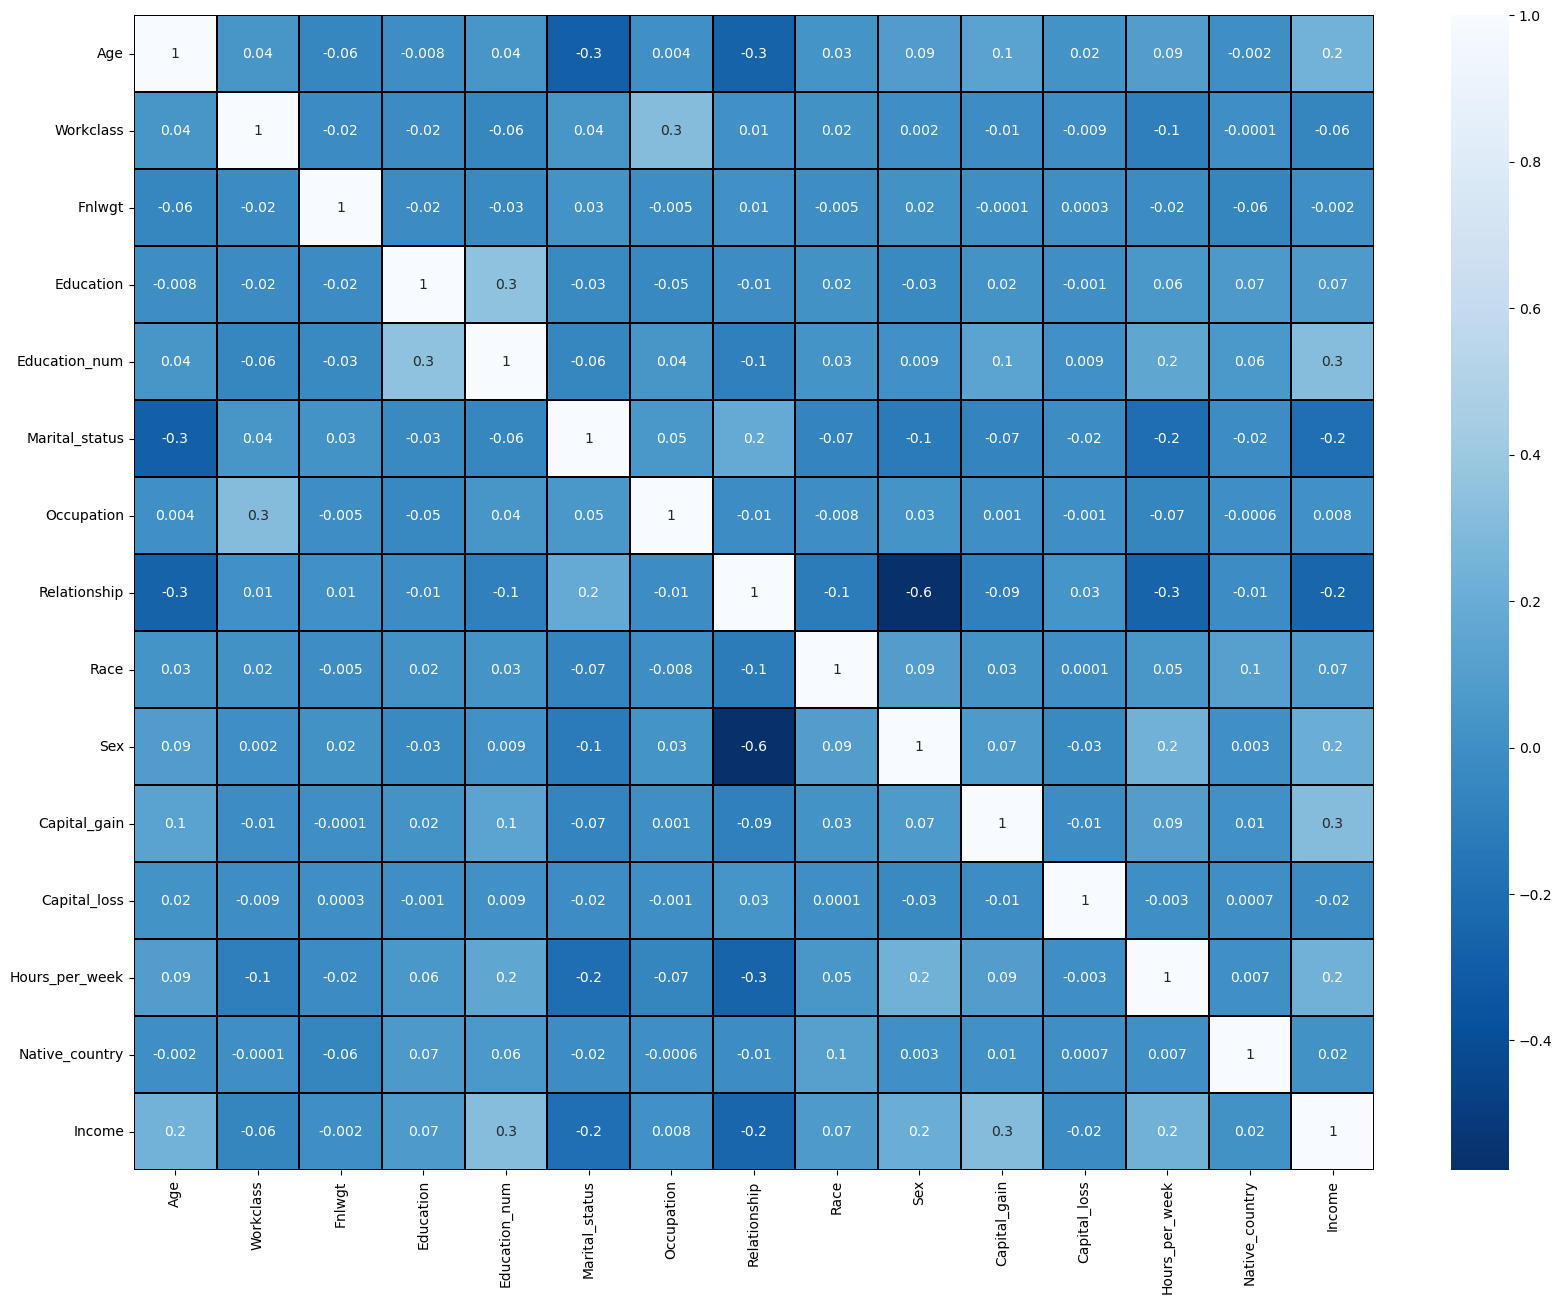

In [47]:
#visualizing corelation matrix using heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.show()

### his heatmap show the corelation matrix by visualizing the data .we can observe the relation between feature to feature and feature to lable in the heat map.

### This heatmap contains both positive  and negative corelation.

### we donot see any strong corelation between features and features and between features and lable.

### so there is no multicolinearity issue present in this data set

### seperating features and lable

### visualizing the corelation between lable and features using barplot

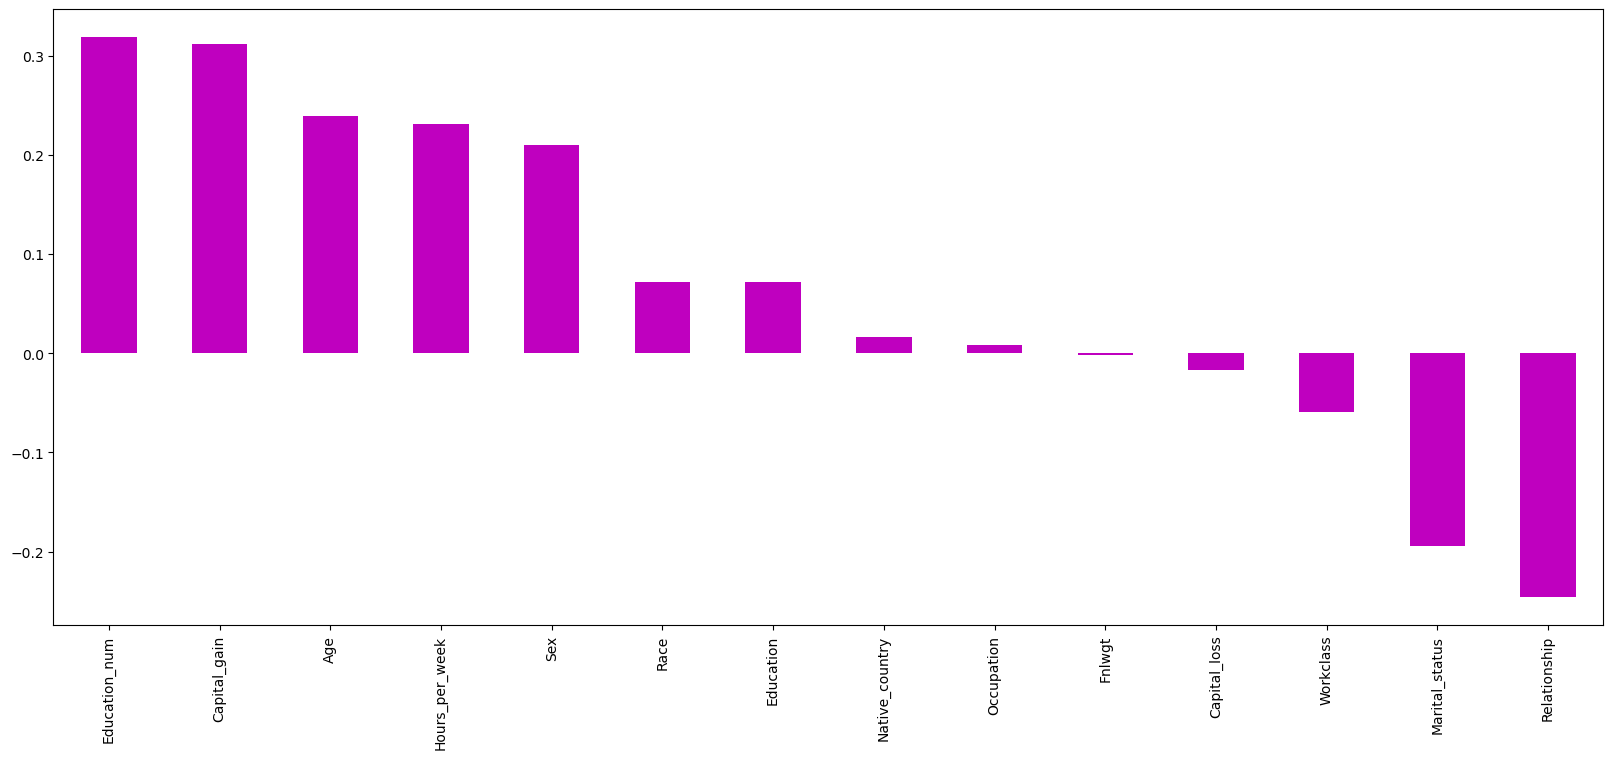

In [48]:
plt.figure(figsize=(20,8))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='m')
plt.show()

In [50]:
#seperating the features and lable into x and y

x=df.drop("Income",axis=1)
y=df['Income']

print(x.shape)
print(y.shape)

(29827, 14)
(29827,)


In [51]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.887615,1.038920,-1.064661,-0.340335,1.191339,-0.410521,-0.781331,-0.919032,0.393963,0.716230,-0.288160,-0.039611,-2.414481,0.246100
1,-0.010760,-0.230866,0.493204,0.176238,-0.439450,-1.731049,-0.320280,-0.297840,0.393963,0.716230,-0.288160,-0.039611,0.009327,0.246100
2,1.112209,-0.230866,0.640198,-2.406628,-1.254844,-0.410521,-0.320280,-0.919032,-1.957360,0.716230,-0.288160,-0.039611,0.009327,0.246100
3,-0.759406,-0.230866,1.290817,-0.340335,1.191339,-0.410521,0.601823,2.186928,-1.957360,-1.396199,-0.288160,-0.039611,0.009327,-5.430816
4,-0.085625,-0.230866,0.979451,0.434525,1.599037,-0.410521,-0.781331,2.186928,0.393963,-1.396199,-0.288160,-0.039611,0.009327,0.246100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29822,-0.834271,-0.230866,0.801066,-0.856909,0.783642,-0.410521,1.293399,2.186928,0.393963,-1.396199,-0.288160,-0.039611,-0.170214,0.246100
29823,0.138969,-0.230866,-0.073181,0.176238,-0.439450,-0.410521,-0.089754,-0.919032,0.393963,0.716230,-0.288160,-0.039611,0.009327,0.246100
29824,1.486532,-0.230866,-0.099918,0.176238,-0.439450,2.230536,-1.472907,1.565736,0.393963,-1.396199,-0.288160,-0.039611,0.009327,0.246100
29825,-1.208594,-0.230866,0.376445,0.176238,-0.439450,0.910008,-1.472907,0.944544,0.393963,0.716230,-0.288160,-0.039611,-1.786086,0.246100


### checking varince infulance factor(vif)

### to conform the multicolinearity

In [52]:
#finding the vif in scaleed column the formula is (1/1-R2)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.180160,Age
1,1.125753,Workclass
2,1.009604,Fnlwgt
3,1.150788,Education
4,1.202233,Education_num
5,1.139474,Marital_status
6,1.122761,Occupation
7,1.672612,Relationship
8,1.030208,Race
9,1.546101,Sex


### we can see that all the VIF values are less than 10 so there is no multicolinearity issue present in the data set

In [53]:
y.value_counts()

0    23173
1     6654
Name: Income, dtype: int64

### Here we can see that data is not balanced,since it is a classifiction problem we will balance the data using oversampling method

In [54]:
!pip install imblearn

In [55]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [56]:
y1.value_counts()

0    23173
1    23173
Name: Income, dtype: int64

### Modeling 


### Finding the best RandomState

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy",maxAccu,"at Random state",maxRS)        
        

Best Accuracy 0.9083716915995397 at Random state 220


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

### Classification Algorithim

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

### RandomForestClassifier

In [60]:
#checking accuracy for randomforestclassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.908084004602992
[[6174  680]
 [ 598 6452]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      6854
           1       0.90      0.92      0.91      7050

    accuracy                           0.91     13904
   macro avg       0.91      0.91      0.91     13904
weighted avg       0.91      0.91      0.91     13904



### LogisticRegression

In [61]:
#checking accuracy for logisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7691311852704258
[[5207 1647]
 [1563 5487]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      6854
           1       0.77      0.78      0.77      7050

    accuracy                           0.77     13904
   macro avg       0.77      0.77      0.77     13904
weighted avg       0.77      0.77      0.77     13904



### SVC

In [62]:
#cheking accuracy for SVC
svm=SVC()
svm.fit(x_train,y_train)
predsvm=svm.predict(x_test)
print(accuracy_score(y_test,predsvm))
print(confusion_matrix(y_test,predsvm))
print(classification_report(y_test,predsvm))

0.8416283084004603
[[5335 1519]
 [ 683 6367]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      6854
           1       0.81      0.90      0.85      7050

    accuracy                           0.84     13904
   macro avg       0.85      0.84      0.84     13904
weighted avg       0.85      0.84      0.84     13904



### GradientBoostingClassifier

In [63]:
#checking accuracy for GradiantBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8714039125431531
[[5815 1039]
 [ 749 6301]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      6854
           1       0.86      0.89      0.88      7050

    accuracy                           0.87     13904
   macro avg       0.87      0.87      0.87     13904
weighted avg       0.87      0.87      0.87     13904



### AdaBoostClassifier

In [64]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.856228423475259
[[5740 1114]
 [ 885 6165]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      6854
           1       0.85      0.87      0.86      7050

    accuracy                           0.86     13904
   macro avg       0.86      0.86      0.86     13904
weighted avg       0.86      0.86      0.86     13904



### BaggingClassifier

In [65]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8865794016110472
[[6121  733]
 [ 844 6206]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      6854
           1       0.89      0.88      0.89      7050

    accuracy                           0.89     13904
   macro avg       0.89      0.89      0.89     13904
weighted avg       0.89      0.89      0.89     13904



### DecisionTreeClassifier

In [66]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT=DT.predict(x_test)
print(accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

0.8576668584579977
[[5858  996]
 [ 983 6067]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      6854
           1       0.86      0.86      0.86      7050

    accuracy                           0.86     13904
   macro avg       0.86      0.86      0.86     13904
weighted avg       0.86      0.86      0.86     13904



In [67]:
#checking cv score for RandomForestClassifier
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predRFC) - score.mean())

[0.82998921 0.88801381 0.92793182 0.9336498  0.93041321]
0.9019995686867512
Differcnce between accuracy score and cross validation score is - 0.006084435916240749


In [68]:
#checking cv score for LogisticRegression
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predLR) - score.mean())

[0.75782093 0.76372856 0.76448376 0.76329701 0.77365412]
0.7645968751552978
Differcnce between accuracy score and cross validation score is - 0.004534310115127949


In [69]:
#checking cv score for GradientBoostingClssifier
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predGB) - score.mean())

[0.81477886 0.85489265 0.88240371 0.88197217 0.88197217]
0.8632039102631023
Differcnce between accuracy score and cross validation score is - 0.0082000022800508


In [70]:
#checking cv score for Support Vector Machine classifier
score=cross_val_score(svm,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predsvm) - score.mean())

[0.82826321 0.82457655 0.84270148 0.84162261 0.844104  ]
0.8362535707581256
Differcnce between accuracy score and cross validation score is - 0.005374737642334759


In [71]:
#checking cv score for AdaBoostingClassifier
score=cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predABC) - score.mean())

[0.80765912 0.84367246 0.86600496 0.86427878 0.86578919]
0.8494809006556171
Differcnce between accuracy score and cross validation score is - 0.00674752281964186


In [72]:
#checking cv score for BaggingClassifier
score=cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predBC) - score.mean())

[0.79223301 0.87344913 0.91886935 0.92372424 0.92059553]
0.8857742532525685
Differcnce between accuracy score and cross validation score is - 0.000805148358478669


In [73]:
#checking cv score for decisionTreeClassifier
score=cross_val_score(DT,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predBC) - score.mean())

[0.77324703 0.83860179 0.88315892 0.88337469 0.88898479]
0.8534734438011988
Differcnce between accuracy score and cross validation score is - 0.033105957809848374


### BaggingClassifier is our best model as the difference between accuracy score and cross validation score is least.


### BaggingClassifier is our Best model


### Hyper parameter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV
params ={'n_estimators':[45,50,67,78,87,90,95,93,72,80,86],
        'random_state':[10,12,14,16,18,20,23,54,76,89,100,104,200],
        'bootstrap':[True,False]}


In [75]:
grd = GridSearchCV(BC,cv=6,param_grid=params,n_jobs=-1)

In [76]:
grd.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [45, 50, 67, 78, 87, 90, 95, 93, 72,
                                          80, 86],
                         'random_state': [10, 12, 14, 16, 18, 20, 23, 54, 76,
                                          89, 100, 104, 200]})

In [82]:
BC=grd.best_estimator_
BC.fit(x_train,y_train)

BaggingClassifier(n_estimators=86, random_state=89)

In [86]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8877301495972382
[[6181  673]
 [ 888 6162]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      6854
           1       0.90      0.87      0.89      7050

    accuracy                           0.89     13904
   macro avg       0.89      0.89      0.89     13904
weighted avg       0.89      0.89      0.89     13904



In [84]:
import pickle
filename='Census.pkl'
pickle.dump(BC,open(filename,'wb'))

In [85]:
import pickle
loaded_model=pickle.load(open('Census.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

88.88089758342923


In [87]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,13894,13895,13896,13897,13898,13899,13900,13901,13902,13903
predicted,1,1,0,1,1,0,0,0,0,1,...,0,0,1,1,0,1,0,1,0,0
original,1,1,0,1,1,0,0,0,0,1,...,0,0,0,1,1,1,0,1,1,0
